# Covid-19 Data Analysis

## Dataset Information

This dataset contains anonymized patient-related information including health pre-conditions. 
It contains 21 features and 1,048,575 unique patients. In the Boolean features, 1 means "yes" and 2 means "no".

    usmer: Indicates whether the patient treated medical units of the first, second or third level.
    medical unit: type of institution of the National Health System that provided the care.
    sex: gender of the patient.
    patient type: wether the patient returned home or headed for hospitalization.
    date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.
    intubed: whether the patient was connected to the ventilator.
    pneumonia: whether the patient already have air sacs inflammation or not.
    age: of the patient.
    pregnant: whether the patient is pregnant or not.
    diabetes: whether the patient has diabetes or not.
    copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
    asthma: whether the patient has asthma or not.
    inmsupr: whether the patient is immunosuppressed or not.
    hypertension: whether the patient has hypertension or not.
    other disease: whether the patient has other disease or not.
    cardiovascular: whether the patient has heart or blood vessels related disease.
    obesity: whether the patient is obese or not.
    renal chronic: whether the patient has chronic renal disease or not.
    tobacco: whether the patient is a tobacco user.
    classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
    icu: Indicates whether the patient had been admitted to an Intensive Care Unit.



### Imports

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### Import dataset

In [271]:
df = pd.read_csv('./covid19.csv')

In [272]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,female,returned home,03/05/2020,NaN,1.0,65,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
1,2,1,male,returned home,03/06/2020,NaN,1.0,72,NaN,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN
2,2,1,male,hospitalization,09/06/2020,1.0,2.0,55,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
3,2,1,female,returned home,12/06/2020,NaN,2.0,53,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
4,2,1,male,returned home,21/06/2020,NaN,2.0,68,NaN,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN


,USMER,MEDICAL_UNIT,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,192706.000000,1.032572e+06,1.048575e+06,521310.000000,1.045237e+06,1.045572e+06,1.045596e+06,1.045171e+06,1.045471e+06,1.043530e+06,1.045499e+06,1.045543e+06,1.045569e+06,1.045355e+06,1.048575e+06,192543.000000
mean,1.632194e+00,8.980565e+00,1.825351,1.864379e+00,4.179410e+01,1.984403,1.880420e+00,1.985594e+00,1.969805e+00,1.986442e+00,1.844349e+00,1.973130e+00,1.980135e+00,1.847145e+00,1.981920e+00,1.919285e+00,5.305653e+00,1.912446
std,4.822084e-01,3.723278e+00,0.379668,3.423854e-01,1.690739e+01,0.123911,3.244694e-01,1.191554e-01,1.711242e-01,1.156451e-01,3.625247e-01,1.617045e-01,1.395369e-01,3.598474e-01,1.332413e-01,2.723973e-01,1.881165e+00,0.282647
min,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
25%,1.000000e+00,4.000000e+00,2.000000,2.000000e+00,3.000000e+01,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000
50%,2.000000e+00,1.200000e+01,2.000000,2.000000e+00,4.000000e+01,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,2.000000
75%,2.000000e+00,1.200000e+01,2.000000,2.000000e+00,5.300000e+01,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.000000
max,2.000000e+00,1.300000e+01,2.000000,2.000000e+00,1.210000e+02,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.000000


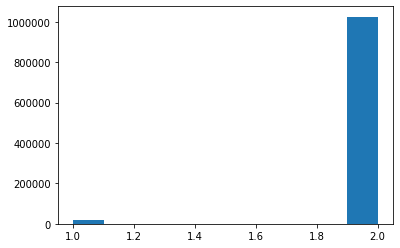

In [273]:
plt.hist(df["CARDIOVASCULAR"]);df.describe()

In [274]:
col_names = df.columns
col_names

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [275]:
sex_values = df['SEX'].unique()
sex_values

array(['female', 'male'], dtype=object)

### Change 'SEX' to numerical value

In [276]:
sex_mapping = {
    'female': 0,
    'male': 1
}

In [277]:
df['SEX'] = df['SEX'].map(sex_mapping)

In [278]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,0,returned home,03/05/2020,NaN,1.0,65,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
1,2,1,1,returned home,03/06/2020,NaN,1.0,72,NaN,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN
2,2,1,1,hospitalization,09/06/2020,1.0,2.0,55,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
3,2,1,0,returned home,12/06/2020,NaN,2.0,53,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
4,2,1,1,returned home,21/06/2020,NaN,2.0,68,NaN,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN


In [279]:
ptype_values = df['PATIENT_TYPE'].unique()
ptype_values

array(['returned home', 'hospitalization'], dtype=object)

### Change 'PATIENT_TYPE' to numerical value

In [280]:
ptype_mapping = {
    'returned home': 0,
    'hospitalization': 1
}

In [281]:
df['PATIENT_TYPE'] = df['PATIENT_TYPE'].map(ptype_mapping)

In [282]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,0,0,03/05/2020,NaN,1.0,65,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
1,2,1,1,0,03/06/2020,NaN,1.0,72,NaN,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN
2,2,1,1,1,09/06/2020,1.0,2.0,55,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
3,2,1,0,0,12/06/2020,NaN,2.0,53,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
4,2,1,1,0,21/06/2020,NaN,2.0,68,NaN,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN


### Check NaN values

In [283]:
NaN_intubed_count = df['INTUBED'].isna().sum()
NaN_intubed_count

855869

In [284]:
NaN_pneumonia_count = df['PNEUMONIA'].isna().sum()
NaN_pneumonia_count

16003

In [285]:
NaN_pregnant_count = df['PREGNANT'].isna().sum()
NaN_pregnant_count

527265

In [286]:
NaN_diabetes_count = df['DIABETES'].isna().sum()
NaN_diabetes_count

3338

In [287]:
NaN_sex_count = df['SEX'].isna().sum()
NaN_sex_count

0

In [288]:
NaN_icu_count = df['ICU'].isna().sum()
NaN_icu_count

856032

In [289]:
NaN_diabetes_recount = df['DIABETES'].isna().sum()
NaN_diabetes_recount

3338

In [290]:
NaN_copd_count = df['COPD'].isna().sum()
NaN_copd_count

3003

In [291]:
NaN_asthma_count = df['ASTHMA'].isna().sum()
NaN_asthma_count

2979

In [292]:
NaN_inmsupr_count = df['INMSUPR'].isna().sum()
NaN_inmsupr_count

3404

In [293]:
NaN_hipertension_count = df['HIPERTENSION'].isna().sum()
NaN_hipertension_count

3104

In [294]:
NaN_other_count = df['OTHER_DISEASE'].isna().sum()
NaN_other_count

5045

In [295]:
NaN_cardio_count = df['CARDIOVASCULAR'].isna().sum()
NaN_cardio_count

3076

In [296]:
NaN_obs_count = df['OBESITY'].isna().sum()
NaN_obs_count

3032

In [297]:
NaN_renal_count = df['RENAL_CHRONIC'].isna().sum()
NaN_renal_count

3006

In [298]:
NaN_tobacco_count = df['TOBACCO'].isna().sum()
NaN_tobacco_count

3220

In [299]:
NaN_icu_count = df['ICU'].isna().sum()
NaN_icu_count

856032

In [300]:
NaN_patient_count = df['PATIENT_TYPE'].isna().sum()
NaN_patient_count

0

In [301]:
NaN_pregnant_count = df['PREGNANT'].isna().sum()
NaN_pregnant_count

527265

### Evaluate Values

In [302]:
pregnant_type = df['PREGNANT'].unique()
pregnant_type

array([ 2., nan,  1.])

In [303]:
icu_types = df['ICU'].unique()
icu_types

array([nan,  2.,  1.])

In [304]:
diabetes_types = df['DIABETES'].unique()
diabetes_types

array([ 2.,  1., nan])

In [305]:
patient_types = df['PATIENT_TYPE'].unique()
patient_types

array([0, 1])

In [306]:
intube_types = df['INTUBED'].unique()
intube_types

array([nan,  1.,  2.])

In [307]:
pregnant_types = df['PREGNANT'].unique()
pregnant_types

array([ 2., nan,  1.])

In [308]:
patient_types = df['PATIENT_TYPE'].unique()
patient_types

array([0, 1])

### Drop NaN Values

In [309]:
pregnant_dropNaN = df.dropna(subset=['PREGNANT'])
pregnant_dropNaN

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,0,0,03/05/2020,NaN,1.0,65,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
3,2,1,0,0,12/06/2020,NaN,2.0,53,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
5,2,1,0,1,9999-99-99,2.0,1.0,40,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
6,2,1,0,0,9999-99-99,NaN,2.0,64,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,NaN
7,2,1,0,0,9999-99-99,NaN,1.0,64,2.0,1.0,...,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048563,2,13,0,0,9999-99-99,NaN,2.0,46,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
1048564,1,13,0,0,9999-99-99,NaN,2.0,30,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,7,NaN
1048565,1,13,0,0,9999-99-99,NaN,2.0,39,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
1048567,1,13,0,1,9999-99-99,2.0,2.0,23,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,7,2.0


In [310]:
diabetes_wNaN = df.dropna(subset=['DIABETES'])
diabetes_wNaN

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,0,0,03/05/2020,NaN,1.0,65,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
1,2,1,1,0,03/06/2020,NaN,1.0,72,NaN,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN
2,2,1,1,1,09/06/2020,1.0,2.0,55,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
3,2,1,0,0,12/06/2020,NaN,2.0,53,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
4,2,1,1,0,21/06/2020,NaN,2.0,68,NaN,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,1,0,9999-99-99,NaN,2.0,40,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
1048571,1,13,1,1,9999-99-99,2.0,2.0,51,NaN,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0
1048572,2,13,1,0,9999-99-99,NaN,2.0,55,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
1048573,2,13,1,0,9999-99-99,NaN,2.0,28,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN


In [311]:
icu_dropNaN = df.dropna(subset=['ICU'])
icu_dropNaN

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
2,2,1,1,1,09/06/2020,1.0,2.0,55,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
5,2,1,0,1,9999-99-99,2.0,1.0,40,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
8,2,1,0,1,9999-99-99,2.0,2.0,37,2.0,1.0,...,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0
9,2,1,0,1,9999-99-99,2.0,2.0,25,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
11,2,1,1,1,9999-99-99,2.0,2.0,24,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048553,2,13,0,1,9999-99-99,2.0,1.0,61,2.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0
1048554,2,13,0,1,9999-99-99,2.0,1.0,63,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,7,2.0
1048567,1,13,0,1,9999-99-99,2.0,2.0,23,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,7,2.0
1048569,1,13,0,1,9999-99-99,2.0,2.0,56,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0


In [312]:
intubed_dropNaN = df.dropna(subset=['INTUBED'])
intubed_dropNaN

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
2,2,1,1,1,09/06/2020,1.0,2.0,55,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
5,2,1,0,1,9999-99-99,2.0,1.0,40,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
8,2,1,0,1,9999-99-99,2.0,2.0,37,2.0,1.0,...,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0
9,2,1,0,1,9999-99-99,2.0,2.0,25,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
11,2,1,1,1,9999-99-99,2.0,2.0,24,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048553,2,13,0,1,9999-99-99,2.0,1.0,61,2.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0
1048554,2,13,0,1,9999-99-99,2.0,1.0,63,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,7,2.0
1048567,1,13,0,1,9999-99-99,2.0,2.0,23,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,7,2.0
1048569,1,13,0,1,9999-99-99,2.0,2.0,56,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0


## Imputation by IterativeImputer

In [313]:
imput = IterativeImputer()

In [314]:
# Imputation on ICU
missing_icu = df.columns[df.isnull().any() & df.columns.str.contains('ICU')]

In [315]:
df[missing_icu] = imput.fit_transform(df.loc[:,missing_icu])

In [316]:
# Imputation on Pregnant
missing_pregnant = df.columns[df.isnull().any() & df.columns.str.contains('PREGNANT')]

In [317]:
df[missing_pregnant] = imput.fit_transform(df[missing_pregnant])

In [335]:
# Imputation on Patient Type
missing_intubed = df.columns[df.isnull().any() & df.columns.str.contains('INTUBED')]

In [336]:
df[missing_intubed] = imput.fit_transform(df[missing_intubed])

## Data Visualization

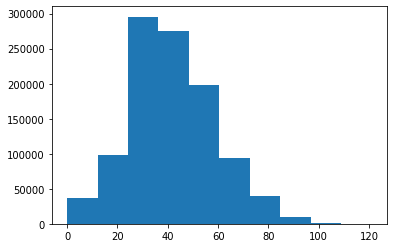

In [320]:
plt.hist(df["AGE"]);

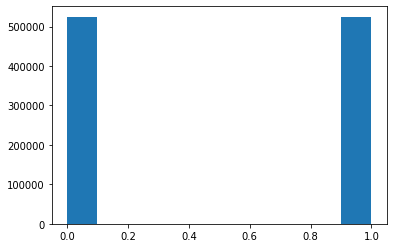

In [321]:
plt.hist(df["SEX"]);

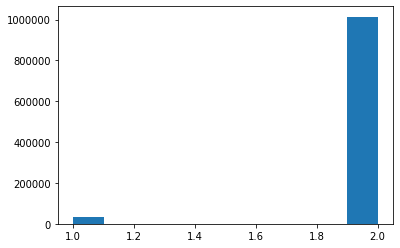

In [322]:
plt.hist(df["ASTHMA"]);

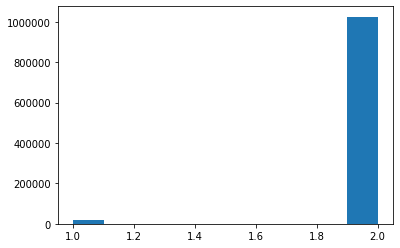

In [323]:
plt.hist(df["CARDIOVASCULAR"]);

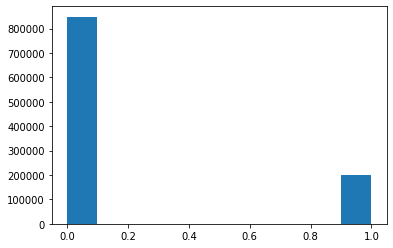

In [324]:
plt.hist(df["PATIENT_TYPE"]);

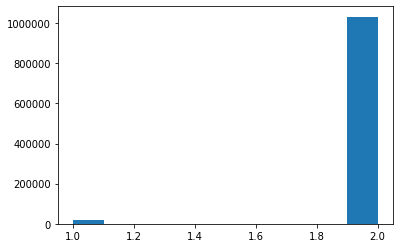

In [325]:
plt.hist(df["ICU"]);

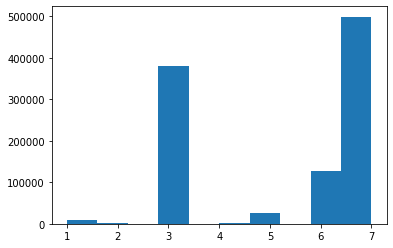

In [326]:
plt.hist(df["CLASIFFICATION_FINAL"]);

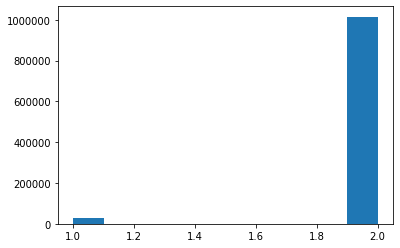

In [327]:
plt.hist(df["OTHER_DISEASE"]);

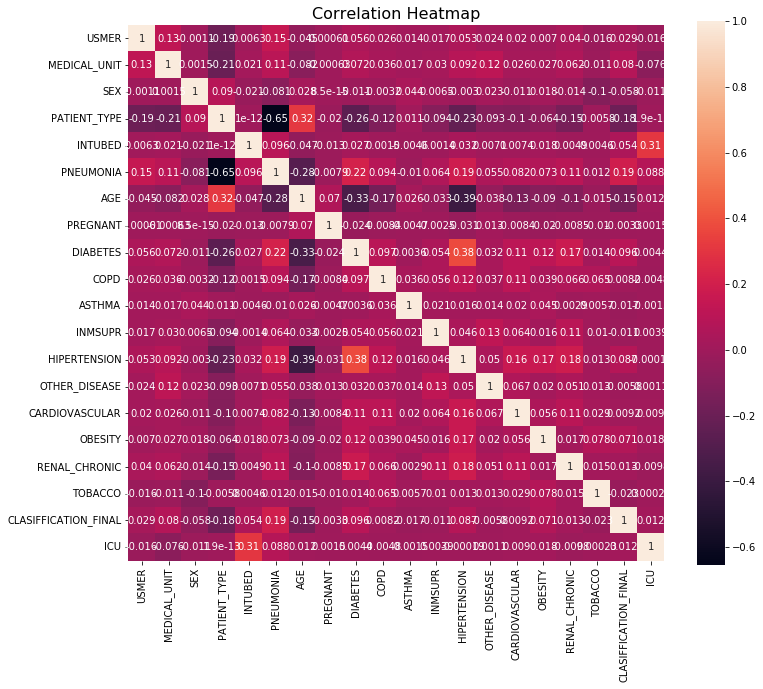

In [337]:
# create heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, square=True)
plt.title("Correlation Heatmap", fontsize=16);

### - Conclusion: There's a relationship between the usmer (level of medical unit treatment) and the admission of patients on icu (intensive care unit)

In [238]:
# create a matrix of scatterplots
#sns.pairplot(df)